<a href="https://colab.research.google.com/github/rosh4github/eportfolio/blob/main/Unit_11_Assignment_Neural_Network_Models_for_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:

University of Essex Online. (2024) *Unit 9 CNN Object Recognition.* [Jupyter notebook]. ML_PCOM7E JULY 2024 Machine Learning July 2024. University of Essex Online.

University of Essex Online. (2024) *Unit 11 Development Individual Project: Presentation Resubmission Question* [Assignment Question]. ML_PCOM7E JULY 2024 Machine Learning July 2024. University of Essex Online.

Gemini (2024) Gemini response to Roshni Kasturi. 4 November.

# Convolutional Neural Networks (CNN) - Handwritten Digit Recognition

# Imports

In [ ]:
# Underlying libraries / functions are using random number generators internally, therefore:

from numpy.random import seed
seed(1212) # calls the imported seed function with a certain value (sets the seed for numpy's random no. generator, i.e. reproducible/repeatable as numpy will generate same sequence of random #s every time the code is run)

# An open-source library for ML
import tensorflow
tensorflow.random.set_seed(112) # sets random seed for tensorflow's random # generator to 112 # reproducibility

In [ ]:
# Importing libraries/modules for bulding, training,  and evaluating a Convolutional Neural Network (CNN)

# Essential libraries

import numpy as np # "Imports the numpy library and assigns it the alias np. NumPy is fundamental for numerical computations in Python, providing powerful array objects and mathematical functions." (Gemini, 2024)

# pandas - for working with and analyzing data
# organizing data in tables/df; cleaning & preparing data for analysis; performing calculations and analysis on data
import pandas as pd


# Deep Learning Tools

import tensorflow as tf # "Imports the tensorflow library and assigns it the alias tf. TensorFlow is a popular deep learning framework used for building and training neural networks." (Gemini, 2024)
import keras # "Imports the keras library, a high-level API for building and training neural networks. Keras often runs on top of TensorFlow." (Gemini, 2024)
from keras.datasets import mnist # imports MNIST dataset from Keras' datasets


# Importing Layers and Optimizers for the CNN

from keras.models import Sequential # to define model/ layers # "Imports the Sequential model from Keras, which allows us to create neural networks by stacking layers sequentially." (Gemini, 2024)

# Dense: "Represents a fully connected layer in the network.
# Conv2D: "Represents a 2-dimensional convolutional layer, essential for feature extraction in images." (Gemini, 2024)
# MaxPool2D: "Represents a 2-dimensional max pooling layer, used to reduce the spatial dimensions of the feature maps." (Gemini, 2024)
# Flatten: "Converts the multi-dimensional feature maps into a single vector, preparing them for the fully connected layers." (Gemini, 2024)
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten # "Imports specific layer types from Keras for building the CNN:" (Gemini, 2024)

from keras import optimizers

# Importing Visualization tools

import matplotlib.pyplot as plt # "Imports the matplotlib.pyplot module and assigns it the alias plt. Matplotlib is a widely used library for creating visualizations in Python." (Gemini, 2024)

# "This is a "magic command" specific to Jupyter notebooks. It ensures that plots generated by Matplotlib are displayed directly within the notebook" (Gemini, 2024)
%matplotlib inline


# Importing Evaluation Tools

from sklearn.metrics import confusion_matrix # "Imports the confusion_matrix function from scikit-learn (sklearn), used to evaluate the performance of a classification model." (Gemini, 2024)


# Importing tools for image display

from IPython.display import display # "Imports the display function, which is helpful for displaying images and other objects within a Jupyter notebook." (Gemini, 2024)
from keras.preprocessing.image import array_to_img # "Imports the array_to_img function, allowing us to convert image data stored as NumPy arrays into image objects." (Gemini, 2024)


# Importing utility functions

from tensorflow.keras.utils import to_categorical # "Imports the to_categorical function, used to convert class labels into a one-hot encoded format suitable for training a neural network." (Gemini, 2024)



Tensorflow is used (one of its most popular backends) to power Keras (high-level API)

- backend: underlying computational engine to perform mathematical ops in training/running a neural network (engine to a car)
- TensorFlow as a backend - provides computational efficiency, flexibility, scalability, large community/support

# Get the Dataset

**"Key Details of the MNIST Dataset:**

**Content:**

The dataset contains grayscale images of handwritten digits (0 through 9), each of which is 28x28 pixels.

**Volume:**

There are 60,000 training images and 10,000 testing images.

**Labelling:**

Each image is labeled with the digit it represents.

**Use Cases:**

MNIST is widely used for training and testing in the field of machine learning and is considered as the "Hello World" dataset of computer vision.

**Variations:**

There are also variations of the original MNIST dataset, like Fashion-MNIST, which contains images of clothing items, and EMNIST, which extends the dataset to include letters in both uppercase and lowercase." (University of Essex Online, 2024).



In [ ]:
# Getting the dataset as a Tuple

# mnist.load_data = function from keras.datasets module specifically designed to load the dataset; when called - dataset is downloaded and loaded into memory
# data returned from call in a specific structure: a tuple of tuples
# each inner tuple contains: 1. image data; 2. corresponding labels
# below is Python's tuple unpacking feature

# x_train_all - img data for training. NumPy array where each element represents an image
# y_train_all - stores the labels for the training images. NumPy array
# x_test - img data for testing
# y_test - stores the labels for the testing images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Constants

# Exploring the Data

Lets look at the first image in the dataset

In [ ]:
x_train.shape # .shape (attribute of NumPy array) results in a tuple (kind of list) w/3 outputs: 1. # of images in dataset, 2. height of each image in pixels, 3. width of each image in pixels; and sometimes - # of color channels

(60000, 28, 28)

In [ ]:
x_train[0] # first image in dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
x_train[0].shape
# "When we access .shape on an array, it gives us a tuple representing the dimensions of that array.
# In the case of an image, it would typically tell us the height, width, and the number of color channels (e.g., 3 for RGB images)." (Gemini, 2024)

(28, 28)

In [ ]:
# reshaping the images to have 3 dimensions (i.e. adding a channel dimension)
# grayscale img, channel dimension = 1
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)

#### Using ipython to display the image

In [ ]:
# To use the ipython display to view an image

# array_to_img function from keras.preprocessing.image module - converts NumPy array representing image data into a PIL (Python Imaging Library) image object for display
pic = array_to_img(x_train_expanded[0])

# display() - function from the IPython.display module - to display objects like images directly within Jupyter
display(pic)

#### Using Matplotlib to view the image

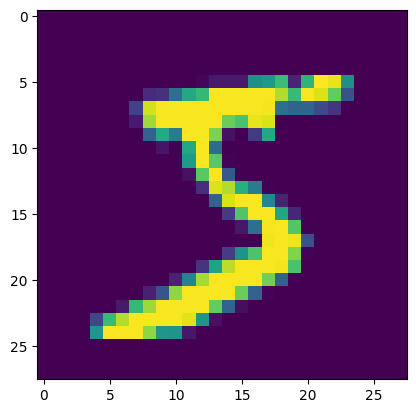

In [ ]:
# function designed to display data as an image
plt.imshow(x_train_expanded[0])


In [ ]:
# To check the label
y_train.shape

(60000,)

In [ ]:
# "[0] selects the first image's label from the training dataset." (Gemini, 2024)
# labels represent the actual digit

y_train[0]

5

In [ ]:
x_train_expanded.shape

(60000, 28, 28, 1)

In [ ]:
number_of_images, x, y, c = x_train_expanded.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 60000 	| width = 28 	| height = 28 	| channels = 1


In [ ]:
x_test_expanded.shape

(10000, 28, 28, 1)

# Preprocess Data

#### Preprocessing data so that it is easier to feed it to the neural network.


### Scaling / normalizing both train and test data


In [ ]:
x_train_expanded = x_train_expanded.astype('float32')
x_train_expanded = x_train_expanded / 255.0 # divides each pixel value by 255, result assigned back to the same variable

In [ ]:
x_test_expanded = x_test_expanded.astype('float32')
x_test_expanded =  x_test_expanded / 255.0 # Why 255? In typical images, pixel values range from 0 to 255 (0 - black; 255 - white; values in between are shades of gray or colors)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Creating categorical encoding for the "y " data

In [ ]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
# one-hot encoding - a way to represent categorical data (e.g. image labels) as numerical vectors
# Neural networks work best w numerical data, but, our labels herein are integers (0, 1, 2..) which can be interpreted to have an ordinal relationship by the network
# ^encoding solves this - now each label converts into a one-hot encoded representation (i.e. binary vector of length 10 classes)

# to_categorical >> function from Keras that performs one-hot encoding; takes original array dataset & # of classes in dataset
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_test = to_categorical(y_test,10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Creating the Validation dataset

For small data we usually go with:
    * 60% for Training
    * 20% Validation
    * 20% Testing
    
Only the final selected model gets to see the testing data. This helps us to ensure that we have close to real data in real-world when the model is deployed. Only our best model gets to see our testing dataset. Because it will give us a realistic impression of how our model will do in the real world
___

However, if the dataset is enormous.:
    * 1% for is used for validation
    * 1% for is used for testing

In [ ]:
VALIDATION_SIZE = 12000 # i.e. 20% for validation --- dataset is seen as small data

In [ ]:
# x_val - will store all validation set image data
# slicing - takes (from the beginning up to but not including) 12000 images and assigns to x_val for validation set
x_val = x_train_expanded[:VALIDATION_SIZE]

# y_val_cat - will store one-hot encoded labels (categorical labels) for the validation set
# first 10,000 labels
y_val_cat = y_cat_train[:VALIDATION_SIZE]
x_val.shape

(12000, 28, 28, 1)

In [ ]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<b>NEXT:</b>
* We Create two NumPy arrays x_train_final and y_train_final
* They will contain the last 48000 values from x_train_all and y_train_all respectively

In [ ]:
x_train_final = x_train_expanded[VALIDATION_SIZE:] #12,000 to end
y_cat_train_final= y_cat_train[VALIDATION_SIZE:]

In [ ]:
x_train_final.shape

(48000, 28, 28, 1)

In [ ]:
y_cat_train_final.shape

(48000, 10)

 ## NOTE:
 <h4>* <em>FILTERS: </em>
    Typical values for the number of filters can be determined by the data set's complexity. So essentially the larger the images, the more variety and the more classes we're trying to classify then the more filters we should have.</h4>
   <h4> * Most times people typically pick filter based on powers of 2, for example, 32. However, if we have more complex data like road signs etc. we should be starting with a higher filter value</h4>
   <h4>The default STRIDE value is 1 x 1 pixel</h4>

# BUILDING THE MODEL

In [ ]:
# Defines and configures the CNN model

# MODEL INITIALIZATION

# initializes a Sequential model (i.e. a linear stack of layers, like building a tower) in Keras
model = Sequential()

# CONVOLUTIONAL LAYER (Conv2D)

# model.add - to add a layer to the sequential model
# Conv2D(...) - adds a 2D convolutional layer;
# - filters/kernels to learn - that detect specific patters in image
# - kernel_size - size of the filter
# - input_shape - only needed for the first layer; tells the model the shape of input images
# - activation - applies the Rectified Linear Unit (ReLU) activation function to the output of the convolutional layer; ReLU introduces non-linearity - crucial for CNNs to learn complex patterns
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER

# MaxPool2D - max pooling layer - max pooling reduces spatial dimensions of feature maps (i.e. output of the convolutional layer) - this helps reduce computation + make model more robust to small variations in the input
# pool_size - specifies size of pooling window (2x2 px herein)
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTENING LAYER

# converts multi-dimensional output of the previous layers into a single, long vector
# ^ necessary to connect it to the fullt connected (dense) layers that follow
model.add(Flatten())

# DENSE LAYER (HIDDEN LAYER)
# called "dense" because every neuron in this layer is connected to every neuron in the previous layer
# 128 NEURONS IN DENSE HIDDEN LAYER (WE CAN CHANGE THIS NUMBER OF NEURONS)
# adds a fully connected layer w/specified neurons
model.add(Dense(128, activation='relu'))

# DENSE LAYER (OUTPUT LAYER)
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES CORRESPONDING TO MNIST DATASET/ 10 (number of neurons in this layer)
# "activation='softmax': This sets the activation function for the output layer to 'softmax'. The softmax function converts the raw output of the neurons into probabilities. It ensures that the sum of probabilities for all classes is equal to 1, making it suitable for multi-class classification problems." (Gemini, 2024)
model.add(Dense(10, activation='softmax'))

# COMPILING THE MODEL

# model.compile - compiles the model / configures it for the training process
# loss = 'categorical_crossentropy' - specifies the loss function to be used during training
# "'Categorical cross-entropy' is a common loss function for multi-class classification problems. It measures the difference between the predicted probabilities and the true labels. The goal during training is to minimize this loss." (Gemini, 2024)
# "optimizer='adam': This sets the optimization algorithm to 'Adam'. Adam is a popular optimization algorithm that adjusts the model's weights during training to minimize the loss function." (Gemini, 2024)
# "metrics=['accuracy']: This defines the metric used to evaluate the model's performance. 'Accuracy' is a common metric that calculates the percentage of correctly classified images." (Gemini, 2024)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary() #built-in method provided by Keras - displays a concise overview of the architecture of the built CNN model
# helps identify issues in model's design before training is started

# shows:
# - layer; output shape (dimensions of output data after passing through each layer);
# - param # (no. of trainable parameters in each layer; weights & biases that the network learns during training. Crucial for understanding the model's complexity and potential for overfitting)
#       "The Param # column helps assess the model's complexity. If we have a very high number of parameters, we might need to consider techniques like regularization to prevent overfitting." (Gemini, 2024)
# - connected to (optional column shows the connections b/w layers, indicating the flow of data within the model)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

**Understanding the Output Shape**

The output shape of a Conv2D layer is determined by several factors:

**Input Shape:** The shape of the data entering the layer. In our case, the input shape is (28, 28, 1).

**Kernel Size:** The size of the convolutional filter. We've specified a kernel size of (3, 3), which means the filter is a 3x3 grid.

**Stride:** The number of pixels the filter moves in each step during the convolution. The default stride in Keras is (1, 1).

**Padding:** How the input is padded to handle the edges of the image. The default padding in Keras is 'valid', which means no padding is applied.

**Filters:** The number of filters used in the layer. We've specified 32 filters.

**Calculating the Output Shape**

With these parameters, here's how the output shape is calculated:

**Spatial Dimensions:**

Without padding ('valid' padding), the output spatial dimensions are calculated as: output_size = (input_size - kernel_size + 1) / stride

In our case: output_width = (28 - 3 + 1) / 1 = 26, output_height = (28 - 3 + 1) / 1 = 26

This gives us an output feature map of size 26x26.

**Filters:**

We've specified 32 filters, which means we'll have 32 of these 26x26 feature maps.

**'None' Dimension:**

The None in the output shape (None, 26, 26, 32) represents the batch size. During training, we'll typically process the data in batches. Keras uses None as a placeholder to indicate that the batch size can be variable. (Gemini, 2024)

### Adding Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # tool that prevents overfitting (happens when a model learns the training data too well including its noise and random fluctuations)
# so it would perform very well on the training data but poorly on unseen data
# tool monitors a specific metric (like validation loss) during training process - if this metric stops improving for a certain # of epochs (training cycles), tool will automatically stop the training process and therefore, overfitting issue

# summary - tool helps find a good balance for the model to train long enough to learn patterns in data, but not so long that it starts memorizing the training data itself

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2) # EarlyStopping callback from the module - in this case - to prevent overfitting
# early_stop - creates an instance of the EarlyStopping callback assigned to early_stop variable
# monitor='val_loss' - tells EarlyStopping to monitor validation loss (measure of how well the data is performing on a separate dataset - validation set - that it is not directly trained on) - good indicator of how well the model generalizes to new, unseen data
# patience = 2 - patience level - no. of consecutive epochs the callback will wait for improvement in the monitored metric before stopping the training process

In [ ]:
# Initiation of the training process

# results of the training process assigned to var. history (to contain loss an accuracy over each epoch)
history = model.fit(x_train_final,y_cat_train_final,epochs=20,batch_size=32,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

# output - training process stopped at epoch 7/25 due to val_loss not decreasing for 2 consecutive rounds after epoch 5

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5824 - loss: 1.3469 - val_accuracy: 0.8917 - val_loss: 0.3616
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.8984 - loss: 0.3433 - val_accuracy: 0.9108 - val_loss: 0.3008
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9136 - loss: 0.2869 - val_accuracy: 0.9247 - val_loss: 0.2595
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.9274 - loss: 0.2443 - val_accuracy: 0.9337 - val_loss: 0.2240
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 24ms/step - accuracy: 0.9382 - loss: 0.2092 - val_accuracy: 0.9422 - val_loss: 0.1959
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9455 - loss: 0.1828 - val_accuracy: 0.9476 - val_loss: 0.1756
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9511 - loss: 0.1627 - val_accuracy: 0.9503 - val_loss: 0.1611
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9555 -

In [ ]:
model.history.history.keys() # asking for the names of the columns in the above 'table'

# "This line is used after training a Keras model to get a list of the metrics that were tracked during training. Here's a step-by-step explanation:
# - model: This refers to our trained Keras model object. It contains information about the model's architecture, weights, and training history.
# - history: This is an attribute of the model object that stores the training history. It's a dictionary-like object.
# - history: This is accessing the actual data within the history object. It contains the recorded values of the metrics over epochs.
# - keys(): This is a method applied to a dictionary (or dictionary-like object) that returns a list of all the keys (names of the metrics)." (Gemini, 2024)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# "passing model.history.history to this function, we're telling Pandas to create a DataFrame where the keys of the model.history.history dictionary become column names, and the corresponding values (the metric values at each epoch) become the data within those columns" (Gemini, 2024)
metrics = pd.DataFrame(model.history.history)


In [ ]:
metrics # shows the contents of the metrics df, showing the recorded performance metrics of CNN model (during training)

,accuracy,loss,val_accuracy,val_loss
0,0.770312,0.793954,0.891750,0.361562
1,0.902125,0.331211,0.910833,0.300770
2,0.916812,0.279053,0.924750,0.259498
3,0.930083,0.236366,0.933750,0.223968
4,0.940646,0.202304,0.942167,0.195897
5,0.947625,0.177079,0.947583,0.175648
6,0.953542,0.157611,0.950250,0.161143
7,0.957625,0.142251,0.953917,0.151264
8,0.961583,0.129736,0.957083,0.140068
9,0.964417,0.119490,0.960167,0.132272


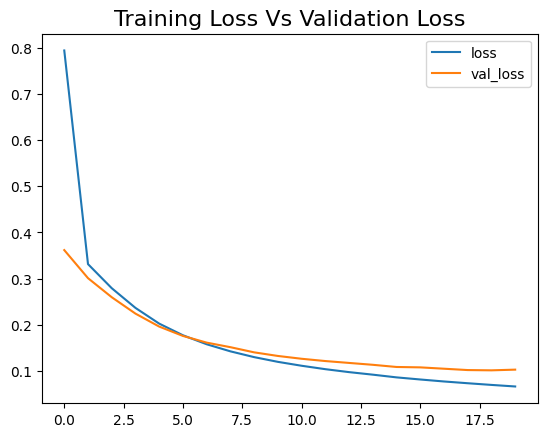

In [ ]:
# loss - i.e. training loss - how well the model is learning on the training data
metrics[['loss', 'val_loss']].plot() # plot() - function provided by Pandas; automatically puts selected columns on the y-axis and the training epochs on the x-axis
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

**Analysis of the resulting plot: Training Loss Vs Validation Loss**



*   Both losses generally decreasing over the epochs (i.e. model is learning and improving its predictions)
*   Both lines are or appear to be converging to a lower value in the later epochs (i.e. model is approaching its optimal performance)


*   Small gap between the two losses (i.e. model is generalizing well to unseen/validation data / is not overfitting to the training data)


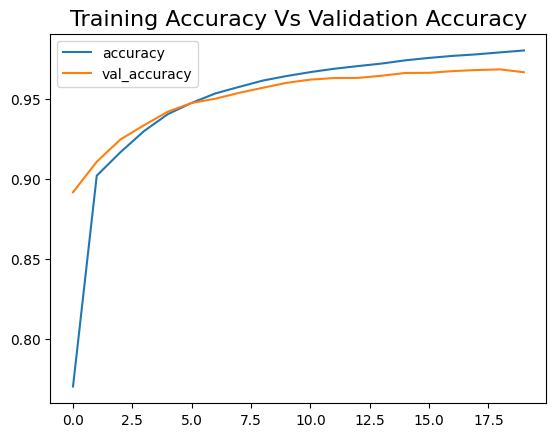

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

**Analysis of the resulting plot: Training Loss Vs Validation Loss**



*   Both accuracies generally increasing and converging over the epochs with an upward trend (i.e. model is learning patterns in data effectively)
*   Both lines reaching high accuracy values (i.e. model is performing well on seen and on unseen data)


*   Both lines are in alignment - validation accuracy following training accuracy (i.e. no signs of over or underfitting - no plateau in validation accuracy or an inverse relationship to training accuracy)

**Areas for potential improvement:**



*   Experimentation with different CNN architectures / variations
*   Experimentation with hyperparameter tuning (such as with no. of filters / kernel size / no. of neurons in dense layers) for optimized model performance

## Validating on Test Data

In [ ]:
model.evaluate(x_test_expanded,y_cat_test) # .evaluate - built-in Keras method - test data is input; assesses how well the model is doing

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9644 - loss: 0.1145


[0.10255538672208786, 0.9679999947547913]

**Output analysis of results on test data:**

313 batches of the test set processed in 2 seconds
loss = 0.1145
accuracy = 0.9644

The loss (categorical cross-entropy) calculated during evaluation is relatively low, and the model correctly classified 96.44% of the handwritten images in the MNIST test set (therefore, accuracy is very good on this dataset).

## Classification Report and Confusion Matrix

In [ ]:
# "- classification_report: This function generates a text report showing the main classification metrics like precision, recall, F1-score, and support for each class in a classification problem. It provides a comprehensive evaluation of the model's performance.
#  - confusion_matrix: This function creates a confusion matrix, which is a table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. It helps visualize where the model is making mistakes." (Gemini, 2024)

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#predictions = model.predict_classes(x_test) # predict_classes method no longer supported
predictions = np.argmax(model.predict(x_test_expanded), axis=-1)

# model.predict(x_test), axis=-1 - predicts the probabilities of each image belonging to each class (of the 10)
# np.argmax - for each image, selects the class w/highest probability as the predicted class label >> stored in the predictions var.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
print(classification_report(y_test,predictions))
# precision - out of all samples predicted as a specific class - # of correct?
# recall - out of all samples that actually belong to a specific class - how many correctly predicted?
# f1 score - harmonic mean of precision & recall - balanced measure of performance
# support - number of actual samples in each class

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.99      0.93      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.94      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



**Examining this classification report:**

97% accuracy

Macro and weighted averages for precision, recall, and F1-score are also 97%
- consistency across averages suggests model is performing well across all classes (no significant bias towards any specific digit)

**Per-class performance:**

**Precision** is between 95-97% for most classes, with digit 2 having a slightly lower precision at 95%

**Recall** - high 90s for most classes, with digit 7 slightly suffering at 93%

**F1-score** - high 90s for most classes, with digits 2, 7, and 9 having lower scores

**Support** - relatively balanced

In [ ]:
confusion_matrix(y_test,predictions)

array([[ 970,    1,    0,    0,    2,    1,    2,    0,    2,    2],
       [   0, 1120,    5,    1,    0,    1,    2,    0,    6,    0],
       [   6,    0, 1006,    2,    3,    1,    2,    2,    9,    1],
       [   1,    0,   13,  969,    1,   12,    0,    3,    6,    5],
       [   1,    0,    3,    0,  949,    1,    4,    1,    2,   21],
       [   2,    1,    0,    7,    0,  871,    3,    1,    3,    4],
       [   7,    3,    1,    0,    4,    9,  929,    1,    4,    0],
       [   0,    8,   22,   11,    2,    1,    0,  956,    2,   26],
       [   9,    1,    7,    7,    6,    6,    4,    2,  928,    4],
       [   1,    5,    0,    2,   10,    7,    1,    1,    0,  982]])

**Confusion matrix basics**

Rows represent true labels; columns represent predicted labels


Diagonal elements of the matrix represent correctly classified instances for each digit

Off-diagonal elements represent misclassifications

**Examining this confusion matrix**



*   Large numbers in the diagonal = model is achieving high accuracy in classifying most digits


*   Off diagonal numbers = very small = low rate of misclassifications


*   Analysis of misclassifications:


1.   Digit 4 misclassified as 9 - 21 times (could be due to the way it is written - 2 different ways)
2.   Digit 7 misclassified as 9 - 26 times

1.   Digit 3 misclassified as 5 - 12 times
2.   Digit 9 misclassified as 4 - 10 times (goes back to 1st misclassification)











# Predicting on single image

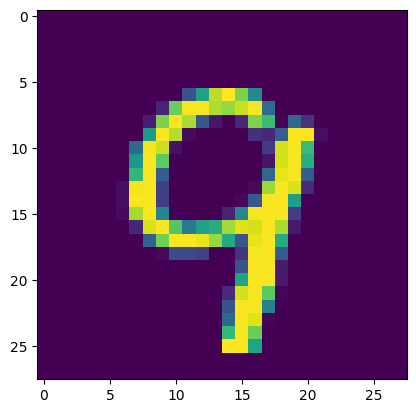

In [ ]:
plt.imshow(x_test_expanded[16]) # imshow - function within matplotlib.pyplot designed to display images

In [ ]:
my_image = x_test_expanded[16]

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)

np.argmax(model.predict(my_image.reshape(1,28,28,1)), axis=-1) # takes the reshaped image data as input and predicts the class label for image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([9])

In [ ]:
y_test[16]

9